# EDA 

In [185]:
import numpy as np
import pandas as pd 
import itertools

# import phik
import scipy.stats as stats

# from phik import resources
# from phik.binning import bin_data
# from phik.report import plot_correlation_matrix

fraud_data = pd.read_csv("/Users/michaelhirschberger/Documents/Vehicle Insurance Claim Fraud Detection/fraud_oracle.csv")

In [186]:
fraud_data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [187]:
fraud_data['VehiclePrice']

0        more than 69000
1        more than 69000
2        more than 69000
3         20000 to 29000
4        more than 69000
              ...       
15415     20000 to 29000
15416     30000 to 39000
15417     20000 to 29000
15418     20000 to 29000
15419     20000 to 29000
Name: VehiclePrice, Length: 15420, dtype: object

In [188]:
fraud_data['DayOfWeekClaimed'].value_counts()

DayOfWeekClaimed
Monday       3757
Tuesday      3375
Wednesday    2951
Thursday     2660
Friday       2497
Saturday      127
Sunday         52
0               1
Name: count, dtype: int64

In [189]:
fraud_data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [190]:
fraud_data.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [191]:
fraud_data.isnull().mean() * 100

Month                   0.0
WeekOfMonth             0.0
DayOfWeek               0.0
Make                    0.0
AccidentArea            0.0
DayOfWeekClaimed        0.0
MonthClaimed            0.0
WeekOfMonthClaimed      0.0
Sex                     0.0
MaritalStatus           0.0
Age                     0.0
Fault                   0.0
PolicyType              0.0
VehicleCategory         0.0
VehiclePrice            0.0
FraudFound_P            0.0
PolicyNumber            0.0
RepNumber               0.0
Deductible              0.0
DriverRating            0.0
Days_Policy_Accident    0.0
Days_Policy_Claim       0.0
PastNumberOfClaims      0.0
AgeOfVehicle            0.0
AgeOfPolicyHolder       0.0
PoliceReportFiled       0.0
WitnessPresent          0.0
AgentType               0.0
NumberOfSuppliments     0.0
AddressChange_Claim     0.0
NumberOfCars            0.0
Year                    0.0
BasePolicy              0.0
dtype: float64

In [192]:
fraud_data_cleaned = fraud_data[(fraud_data['Age'] >= 16) & (fraud_data['DayOfWeekClaimed'] != '0')]
fraud_data_cleaned['Date'] = pd.to_datetime(fraud_data_cleaned['Month'] + ' ' + fraud_data_cleaned['Year'].apply(str))

/var/folders/n4/l157spx926v02fvwd34yfcc80000gn/T/ipykernel_44169/3638797489.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fraud_data_cleaned['Date'] = pd.to_datetime(fraud_data_cleaned['Month'] + ' ' + fraud_data_cleaned['Year'].apply(str))
/var/folders/n4/l157spx926v02fvwd34yfcc80000gn/T/ipykernel_44169/3638797489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_data_cleaned['Date'] = pd.to_datetime(fraud_data_cleaned['Month'] + ' ' + fraud_data_cleaned['Year'].apply(str))


In [193]:
fraud_data_cleaned['DayOfWeekClaimed'].value_counts()

DayOfWeekClaimed
Monday       3684
Tuesday      3297
Wednesday    2890
Thursday     2616
Friday       2434
Saturday      127
Sunday         52
Name: count, dtype: int64

In [194]:
fraud_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15100 entries, 0 to 15419
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Month                 15100 non-null  object        
 1   WeekOfMonth           15100 non-null  int64         
 2   DayOfWeek             15100 non-null  object        
 3   Make                  15100 non-null  object        
 4   AccidentArea          15100 non-null  object        
 5   DayOfWeekClaimed      15100 non-null  object        
 6   MonthClaimed          15100 non-null  object        
 7   WeekOfMonthClaimed    15100 non-null  int64         
 8   Sex                   15100 non-null  object        
 9   MaritalStatus         15100 non-null  object        
 10  Age                   15100 non-null  int64         
 11  Fault                 15100 non-null  object        
 12  PolicyType            15100 non-null  object        
 13  VehicleCategory      

In [195]:
%%time
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

CPU times: user 483 µs, sys: 19 µs, total: 502 µs
Wall time: 507 µs


In [196]:
fraud_data_cleaned['FraudFound_P'].value_counts()

FraudFound_P
0    14208
1      892
Name: count, dtype: int64

In [197]:
fraud_data_cleaned['FraudFound_P'].value_counts(normalize=True)

FraudFound_P
0    0.940927
1    0.059073
Name: proportion, dtype: float64

In [198]:
fraudulent_claims = fraud_data_cleaned[fraud_data_cleaned['FraudFound_P'] == 1]

In [199]:
fraudulent_claims.shape

(892, 34)

<Axes: xlabel='AccidentArea', ylabel='count'>

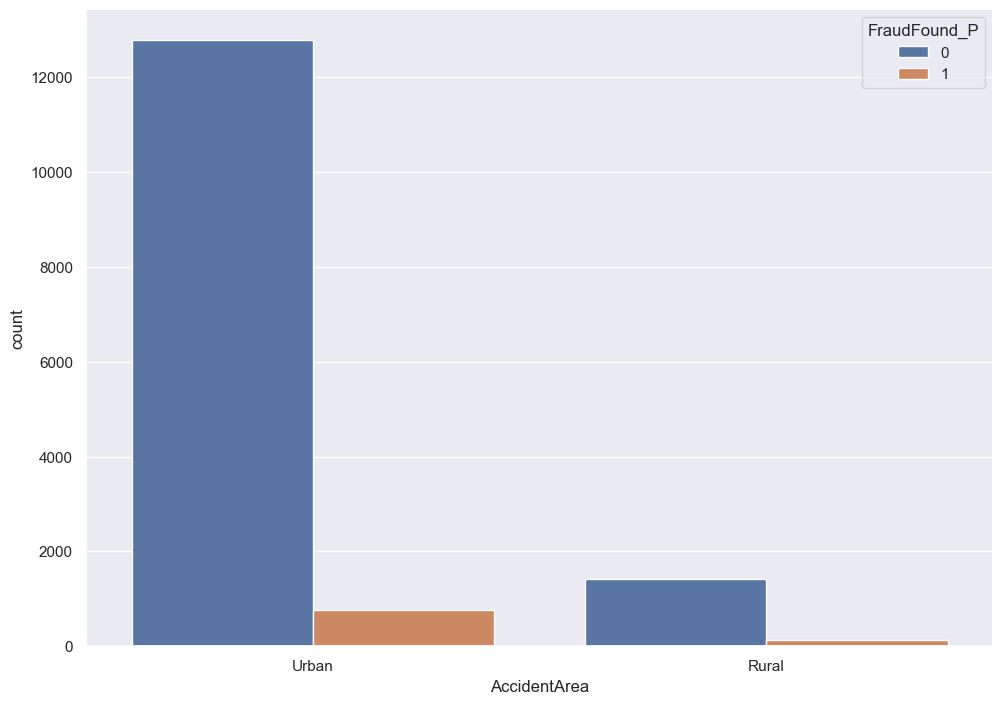

In [200]:
sns.countplot(data=fraud_data_cleaned, x='AccidentArea', hue='FraudFound_P')

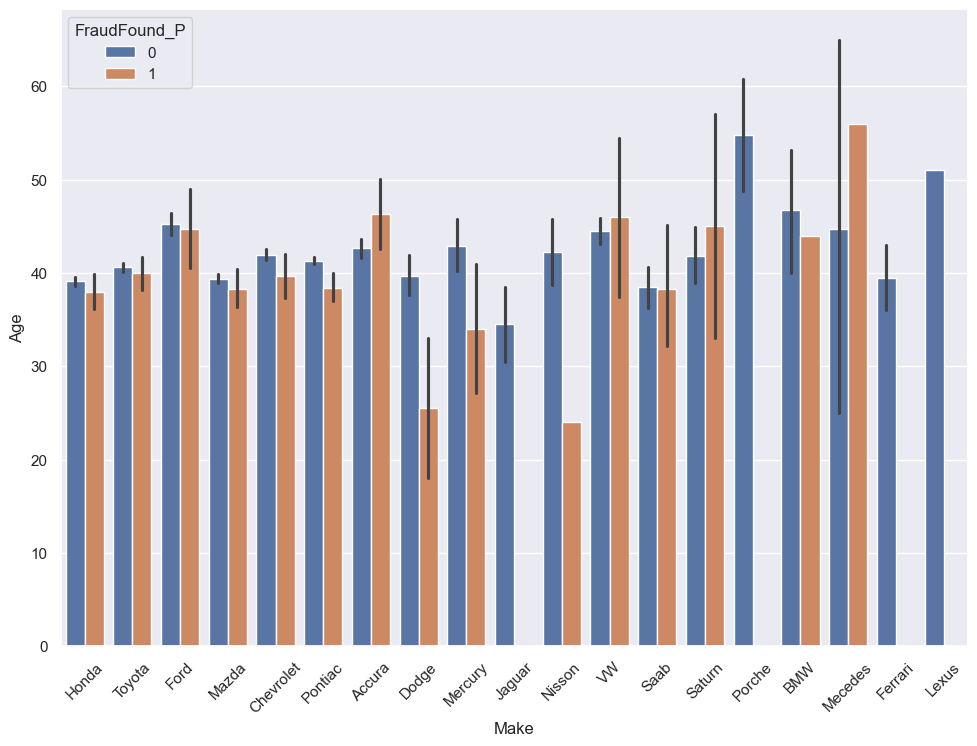

In [201]:
make_age = sns.barplot(data=fraud_data_cleaned, x="Make", y="Age", hue="FraudFound_P")
make_age.tick_params(axis='x', labelrotation=45)

In [202]:
fraud_data_cleaned.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'Date'],
      dtype='object')

In [203]:
fraud_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15100 entries, 0 to 15419
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Month                 15100 non-null  object        
 1   WeekOfMonth           15100 non-null  int64         
 2   DayOfWeek             15100 non-null  object        
 3   Make                  15100 non-null  object        
 4   AccidentArea          15100 non-null  object        
 5   DayOfWeekClaimed      15100 non-null  object        
 6   MonthClaimed          15100 non-null  object        
 7   WeekOfMonthClaimed    15100 non-null  int64         
 8   Sex                   15100 non-null  object        
 9   MaritalStatus         15100 non-null  object        
 10  Age                   15100 non-null  int64         
 11  Fault                 15100 non-null  object        
 12  PolicyType            15100 non-null  object        
 13  VehicleCategory      

In [204]:
categorical = [
"MonthClaimed",
"Fault",
"PolicyType",
"VehicleCategory",
#"VehiclePrice",
"Days_Policy_Accident",
"Days_Policy_Claim",
"AgeOfVehicle",
"AgeOfPolicyHolder",
"PoliceReportFiled",
"WitnessPresent",
"AgentType",
"NumberOfSuppliments",
"AddressChange_Claim",
"NumberOfCars",
"BasePolicy"]

numerical = ["WeekOfMonth",
"WeekOfMonthClaimed",
"VehiclePrice",
"Deductible",
"DriverRating"]

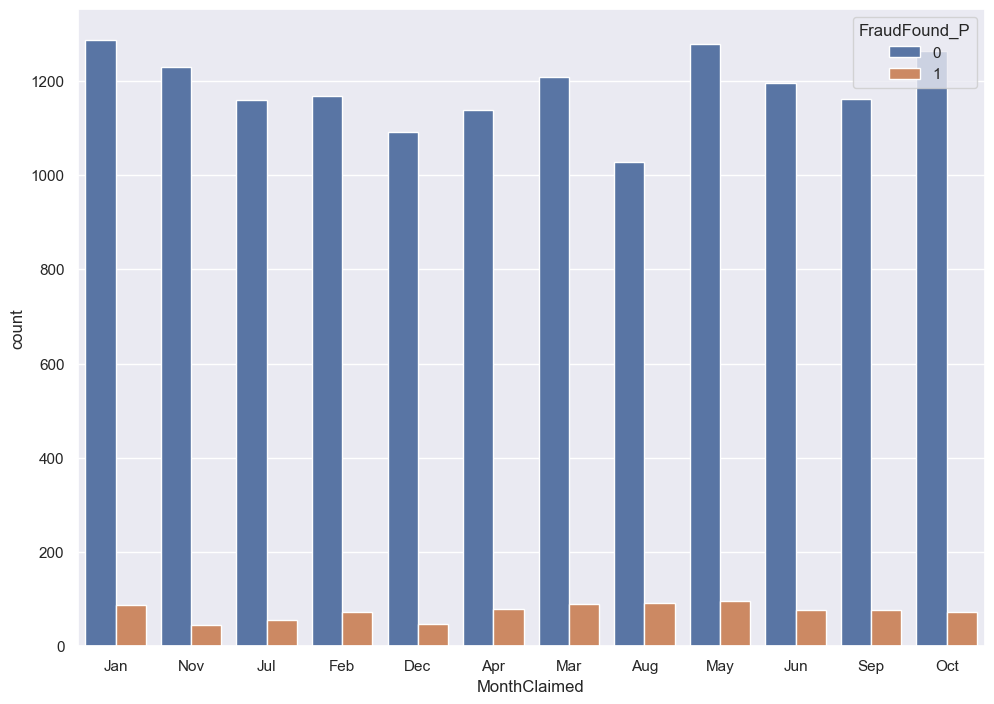

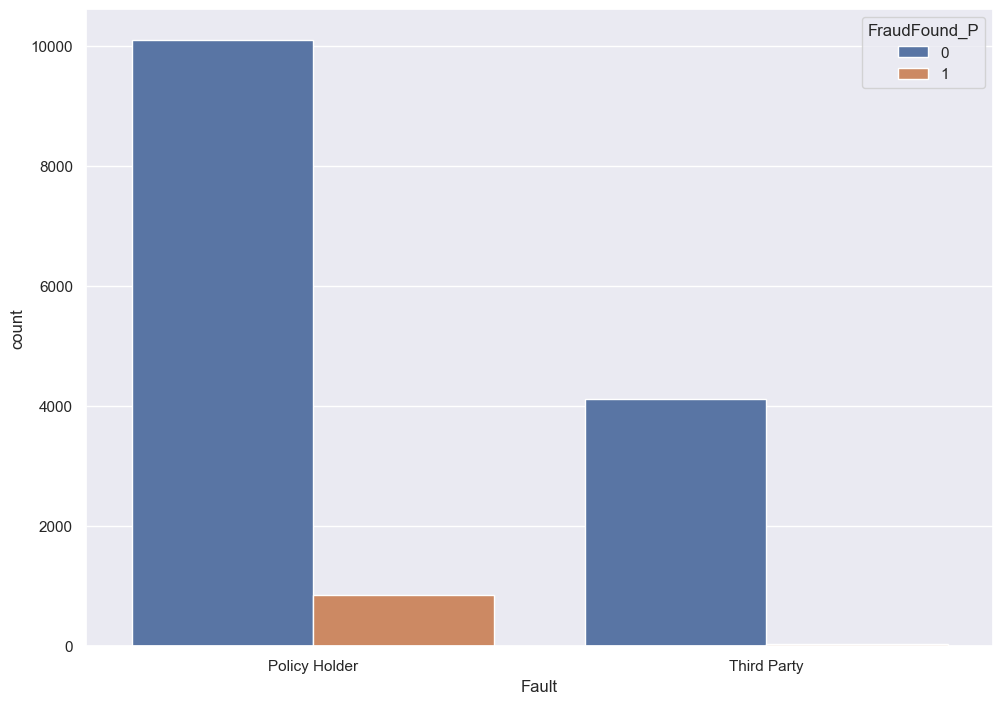

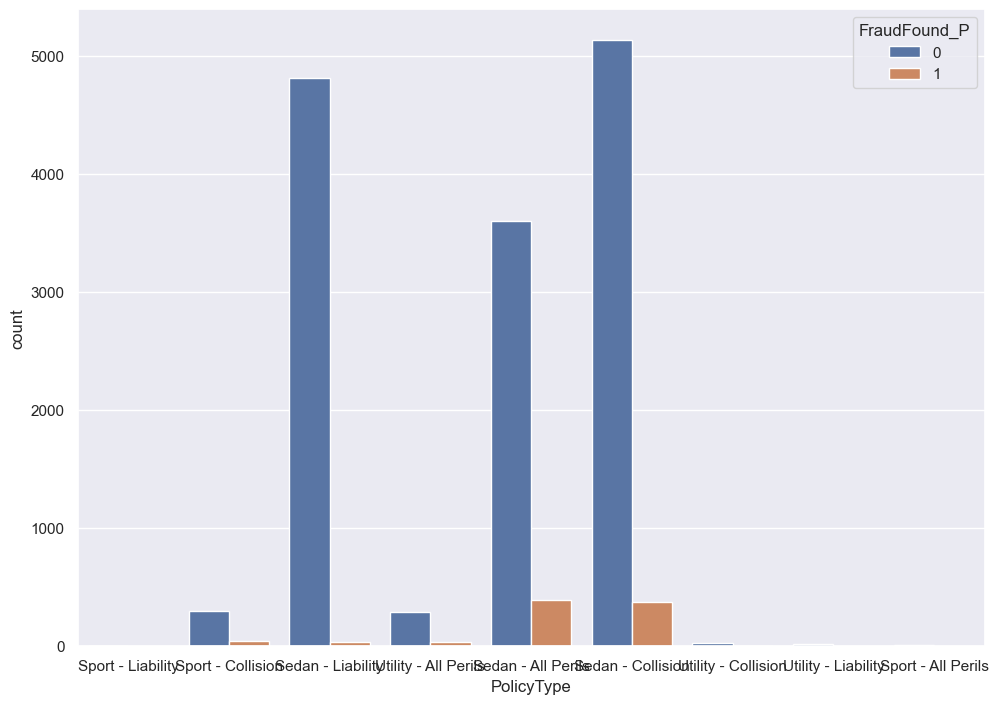

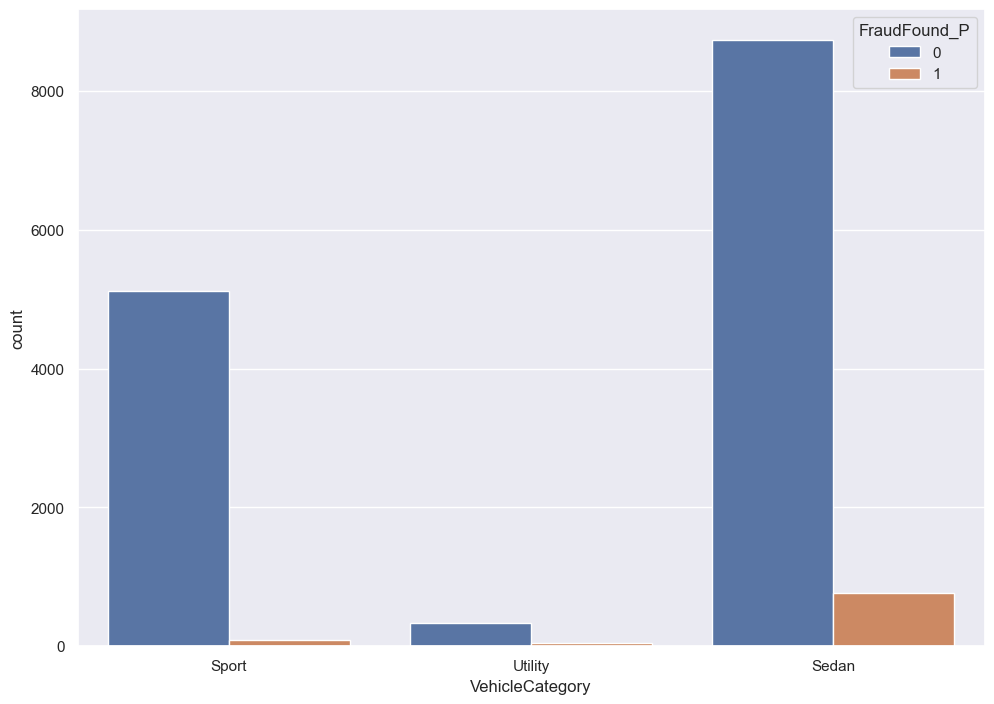

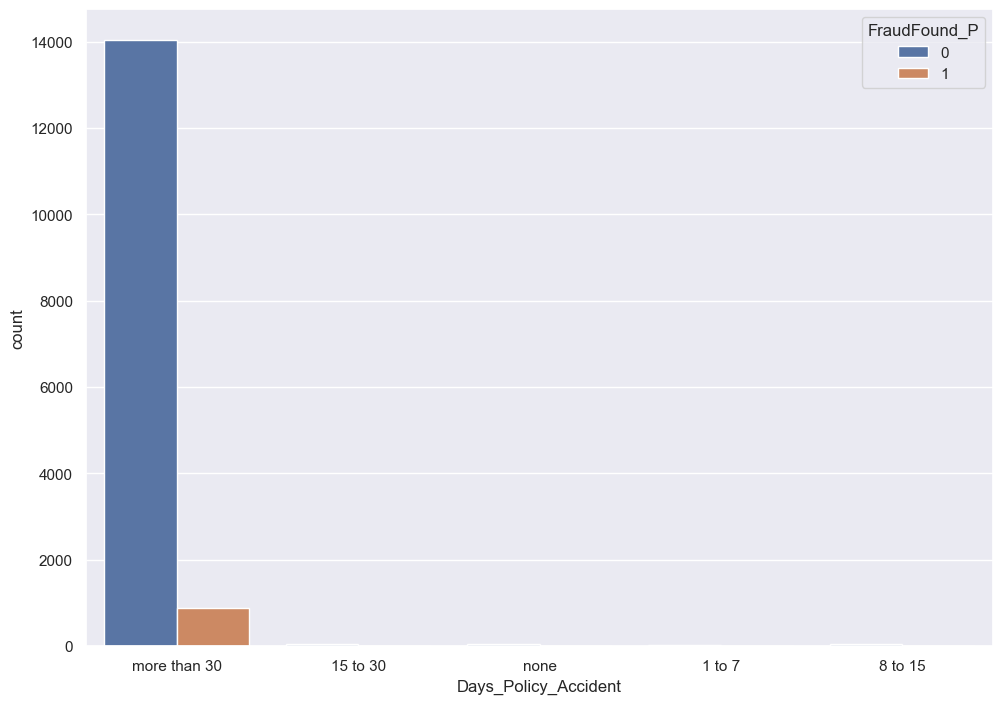

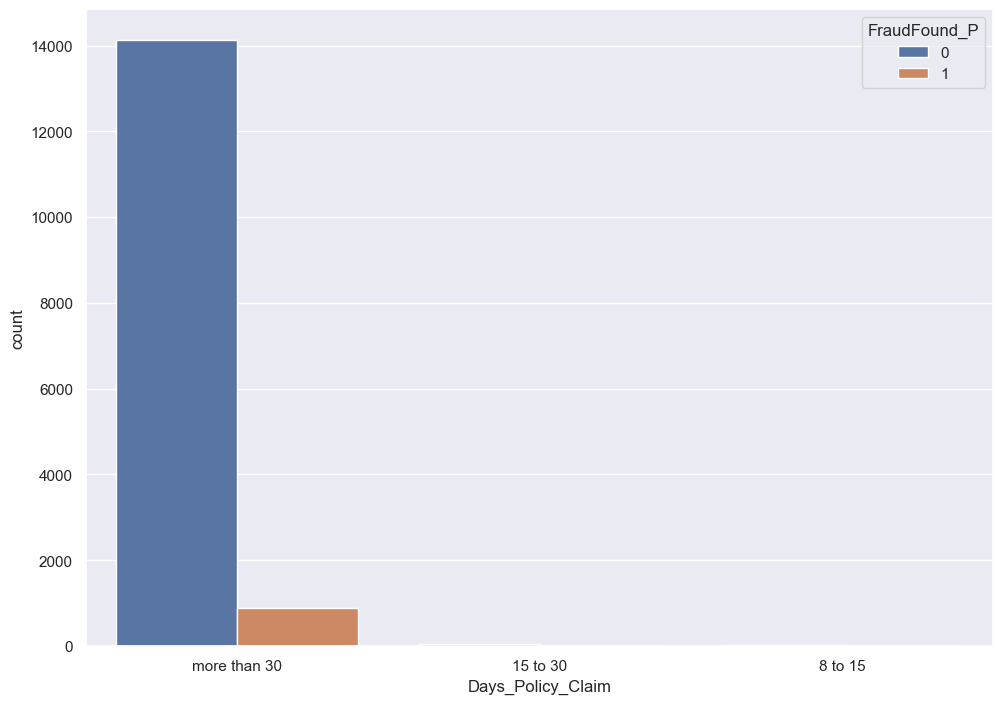

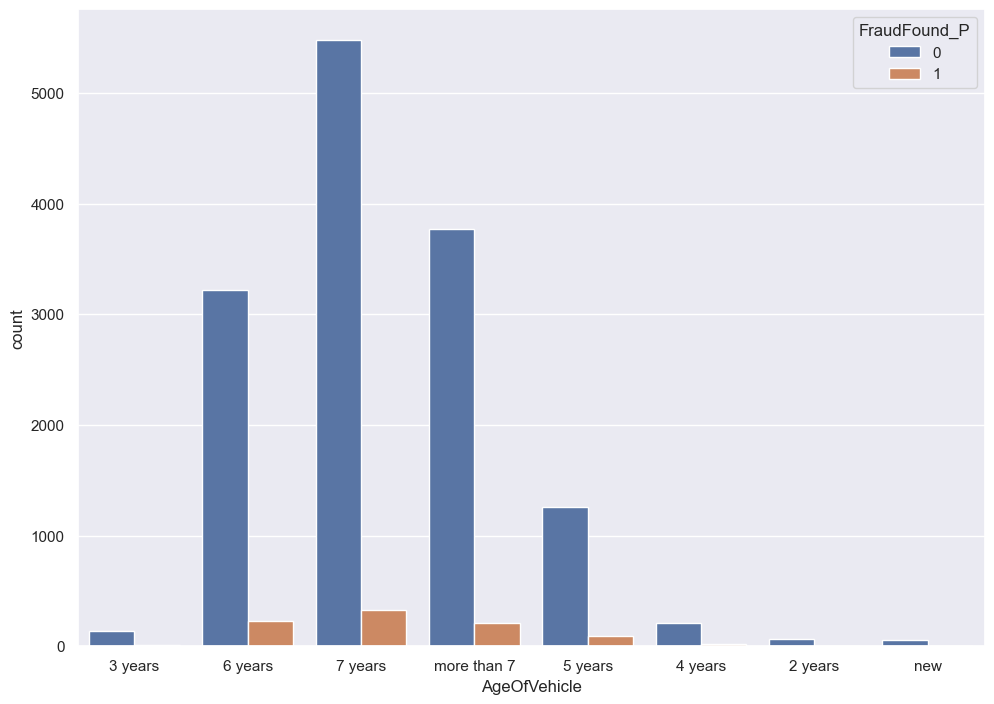

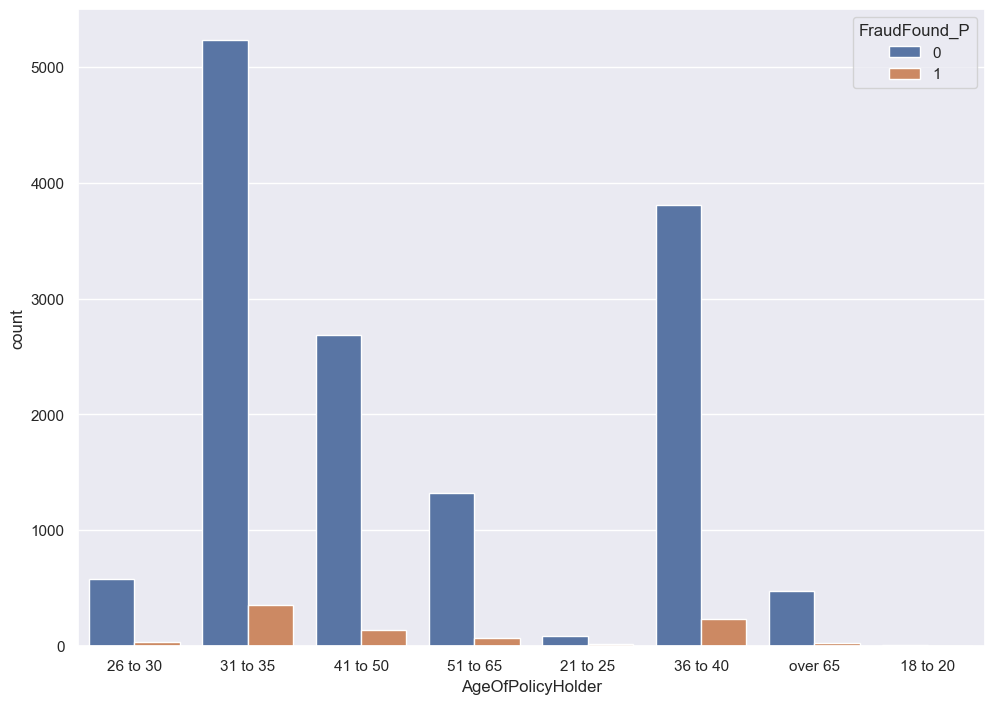

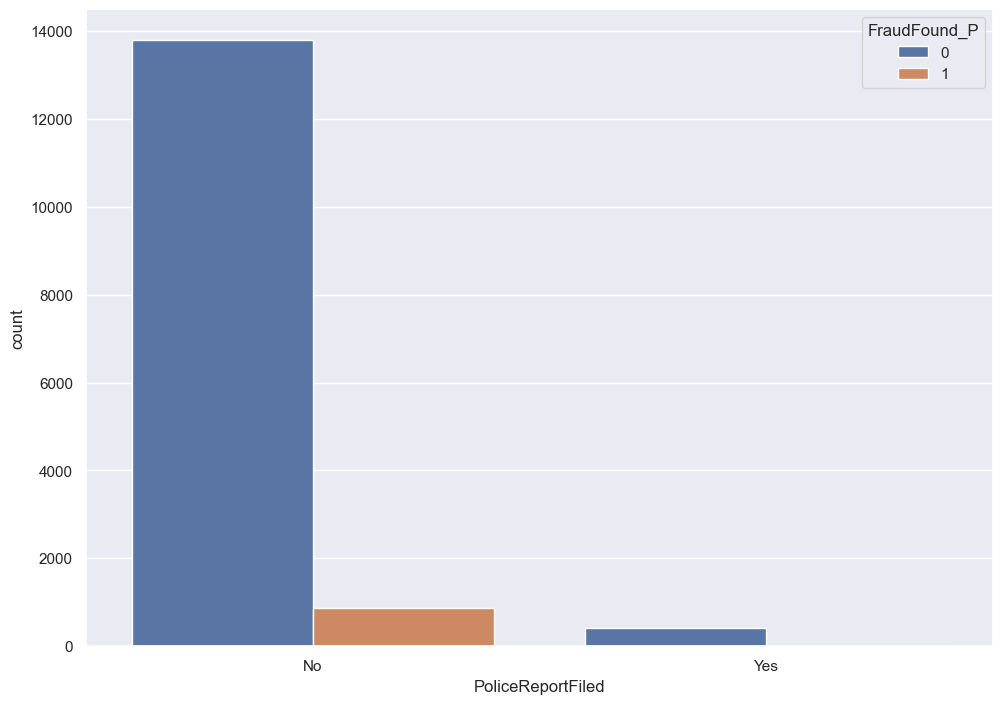

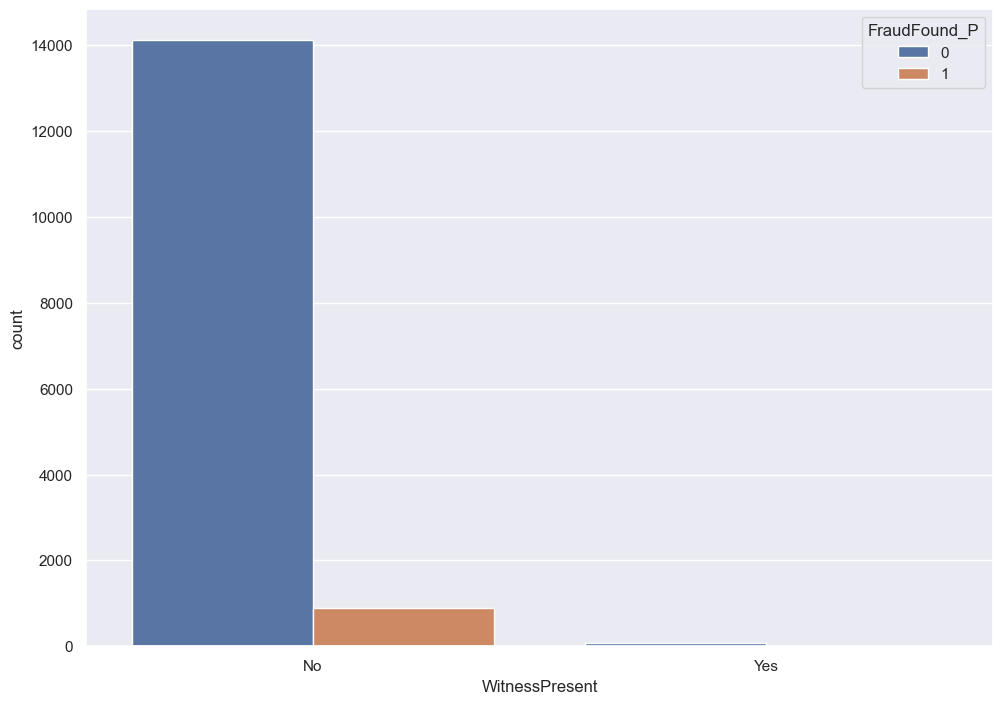

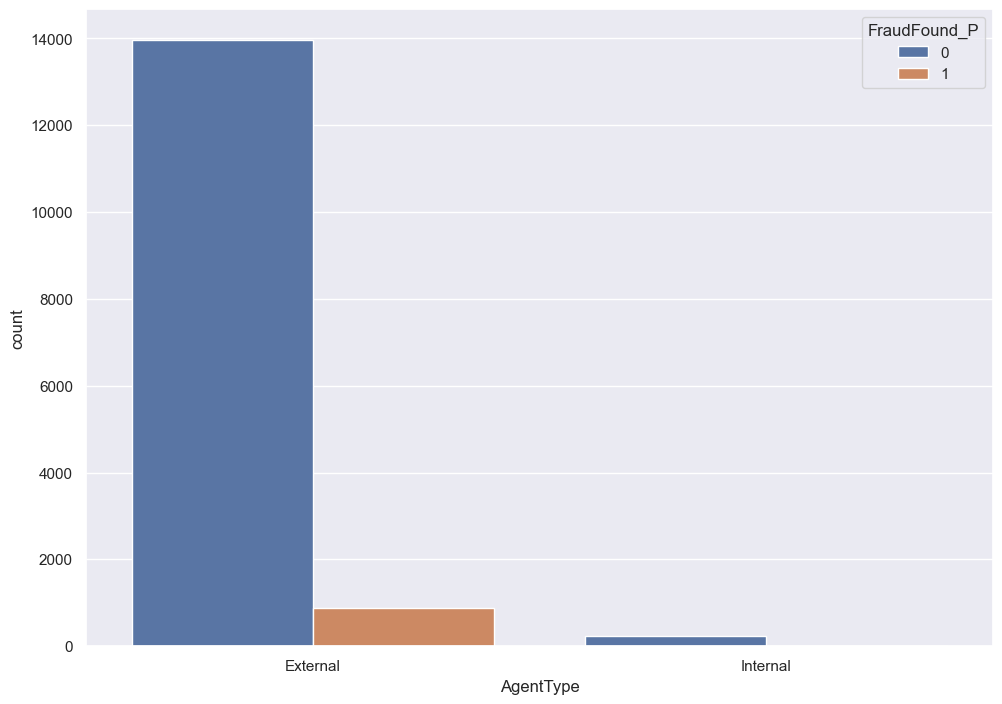

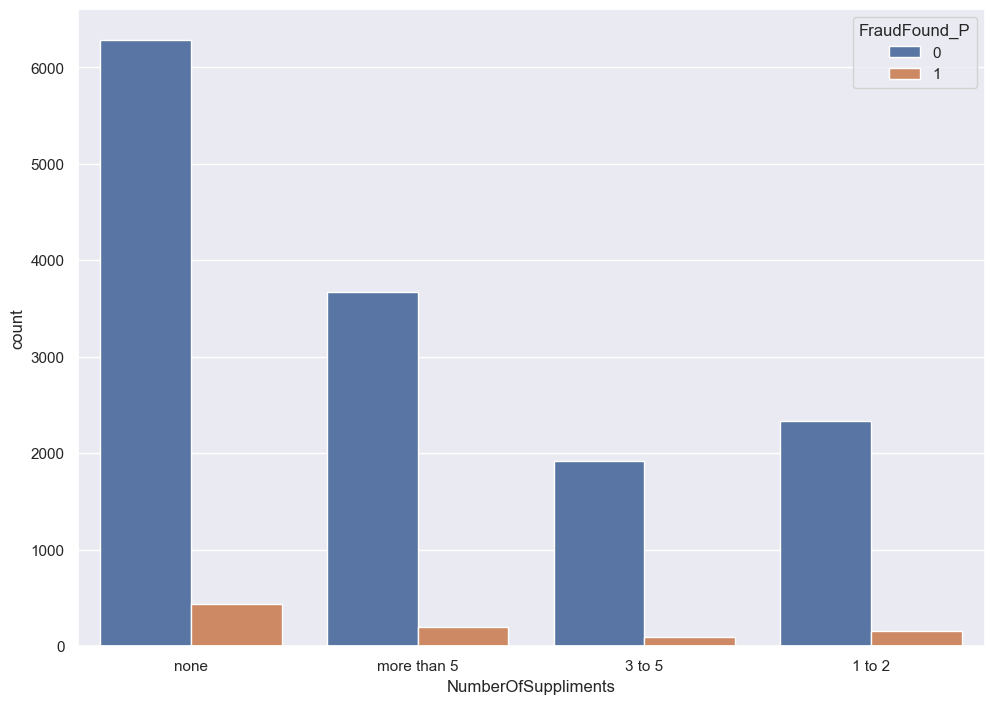

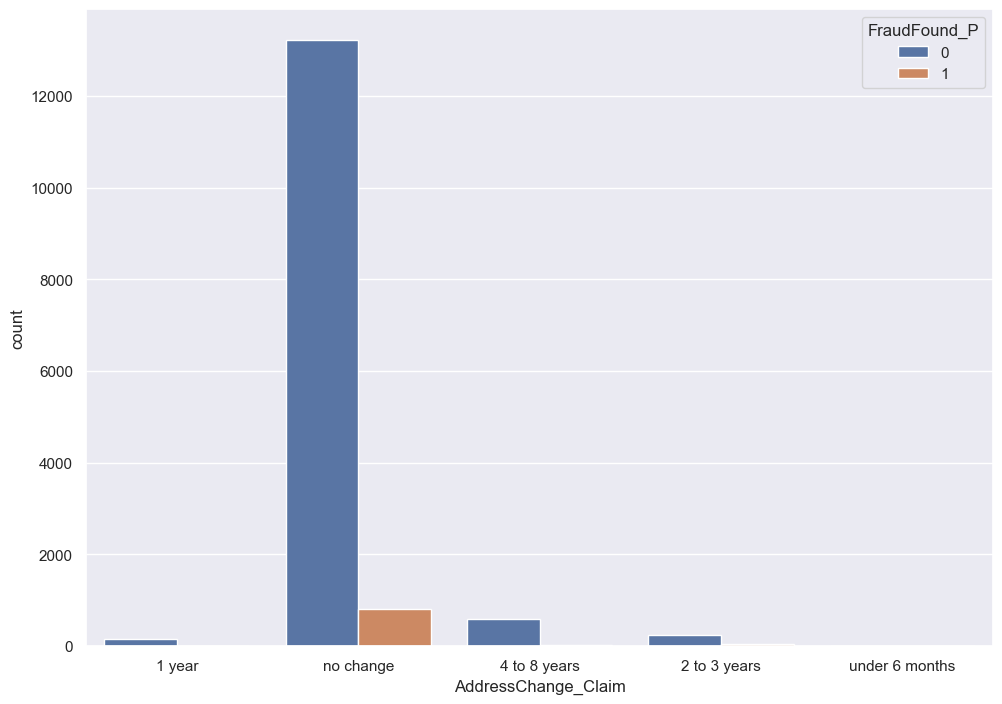

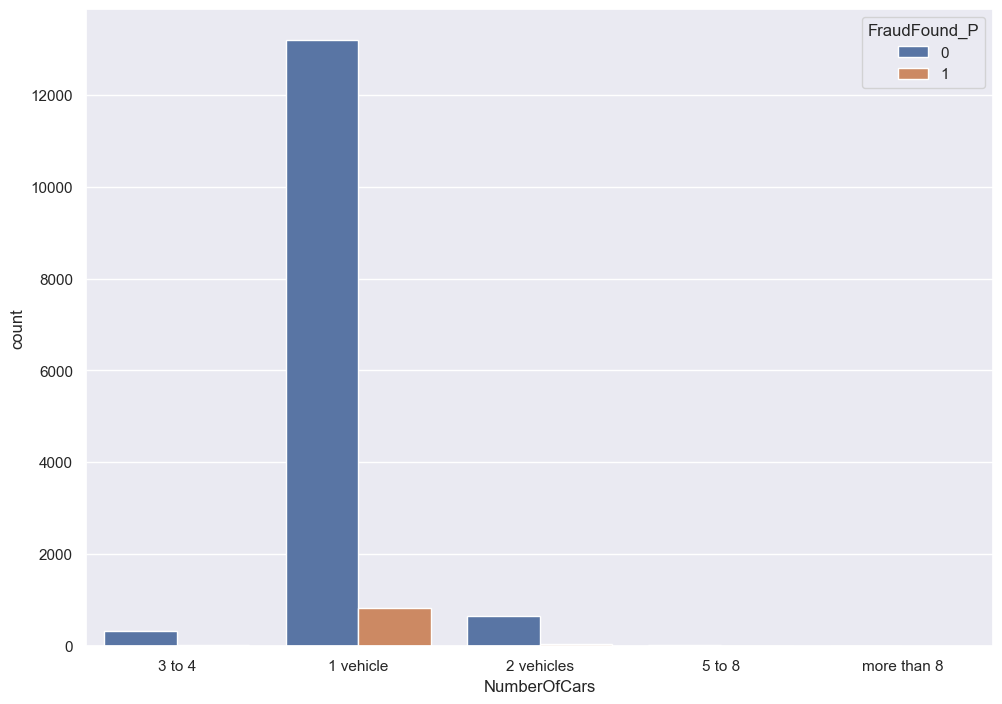

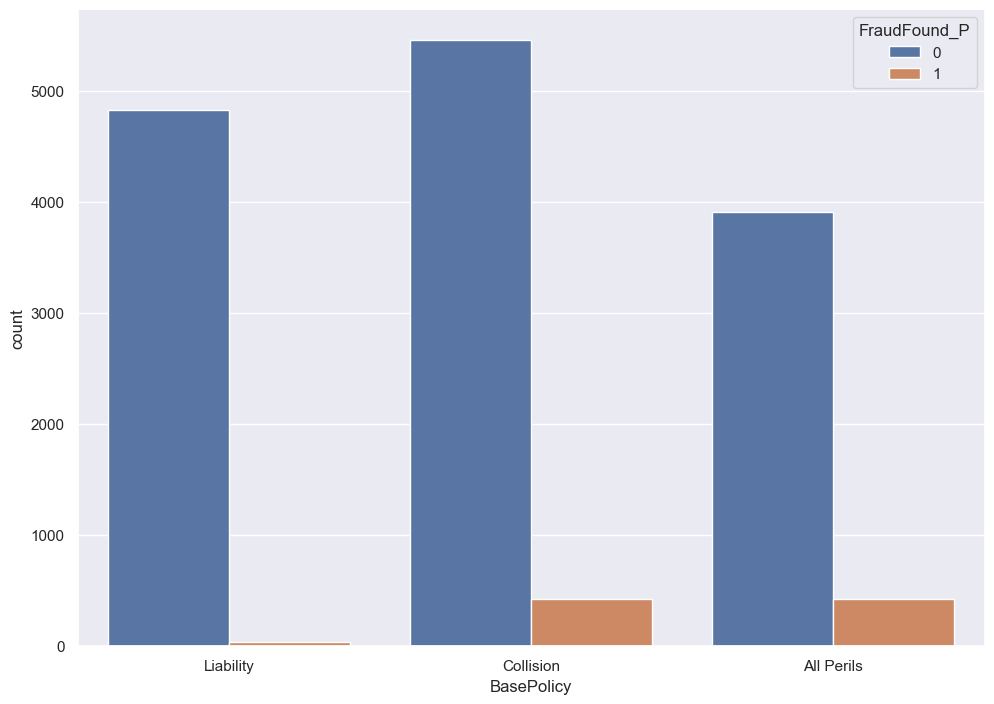

In [205]:
import matplotlib.pyplot as plt
for i in categorical:
    plt.figure()
    sns.countplot(data=fraud_data_cleaned, x=i, hue="FraudFound_P")
    

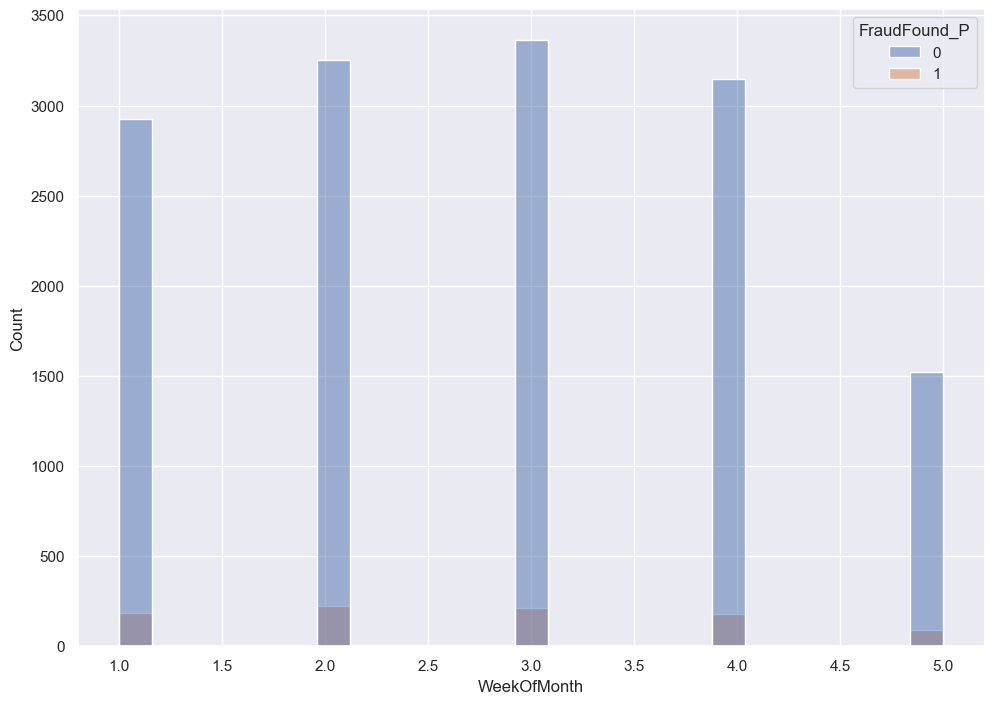

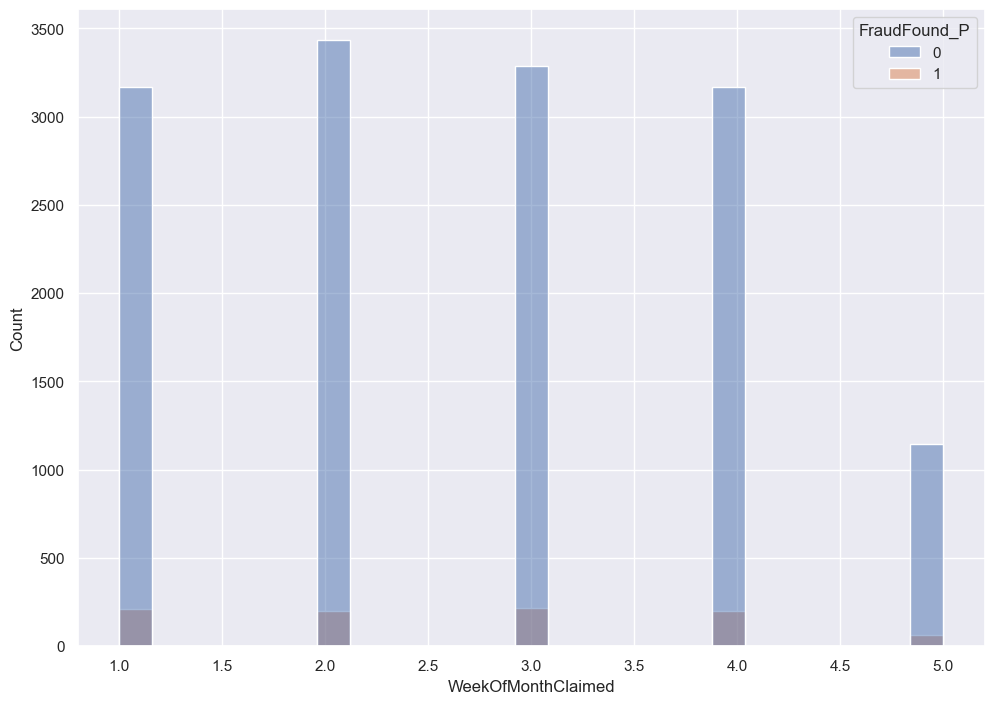

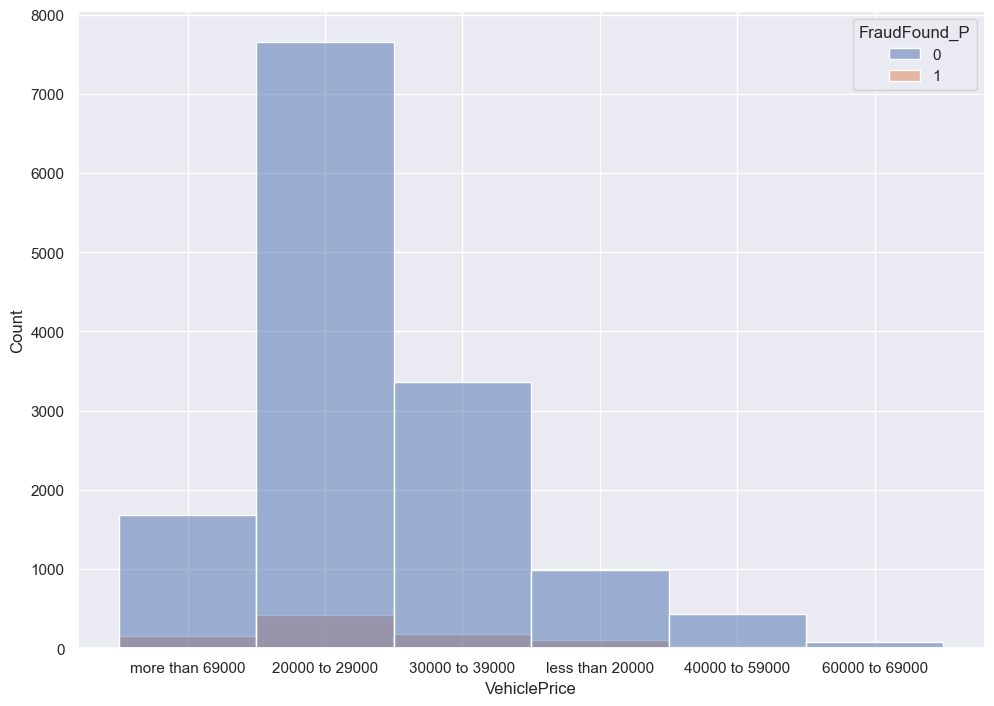

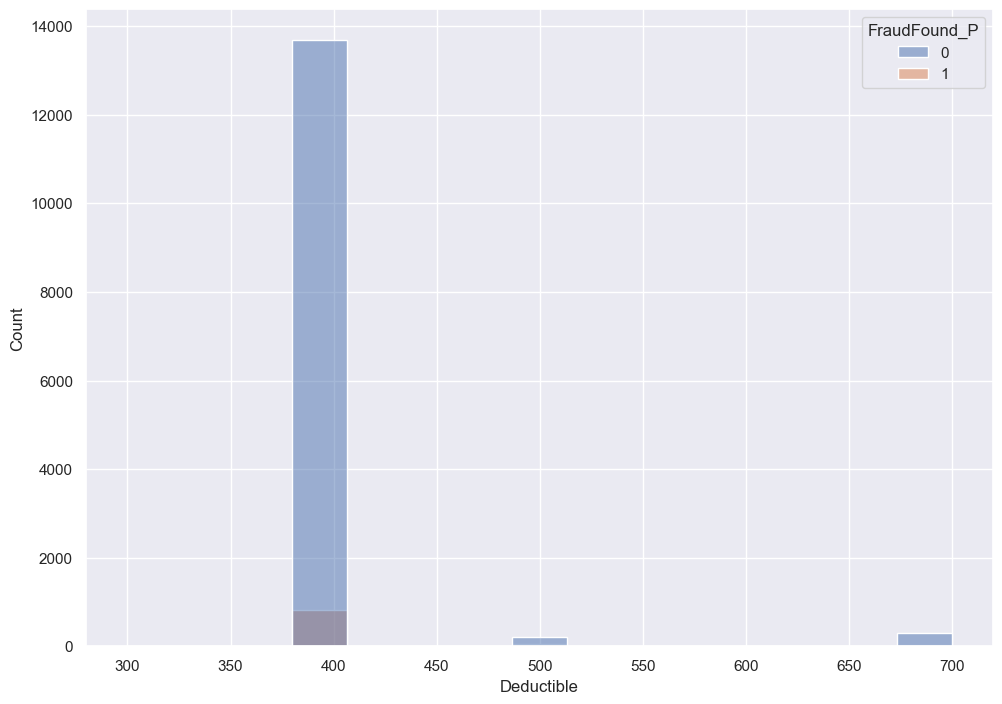

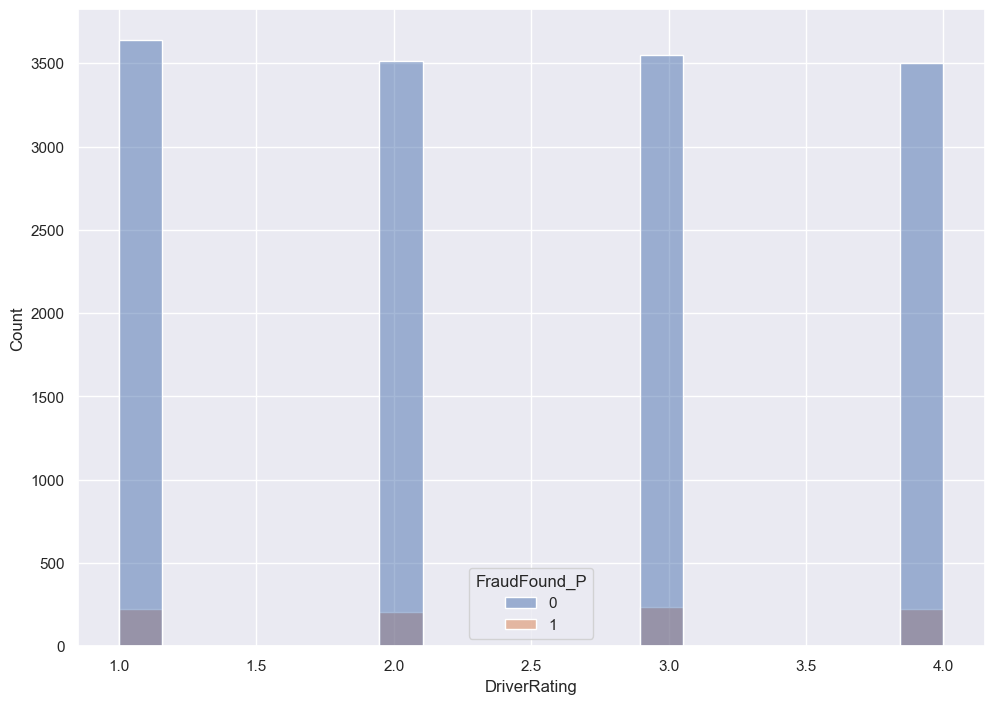

In [206]:
import matplotlib.pyplot as plt
for i in numerical:
    plt.figure()
    sns.histplot(data=fraud_data_cleaned, x=i, hue="FraudFound_P")

In [207]:
fraud_data_cleaned["BasePolicy"]

0         Liability
1         Collision
2         Collision
3         Liability
4         Collision
            ...    
15415     Collision
15416     Liability
15417     Collision
15418    All Perils
15419     Collision
Name: BasePolicy, Length: 15100, dtype: object

<Axes: xlabel='Sex', ylabel='count'>

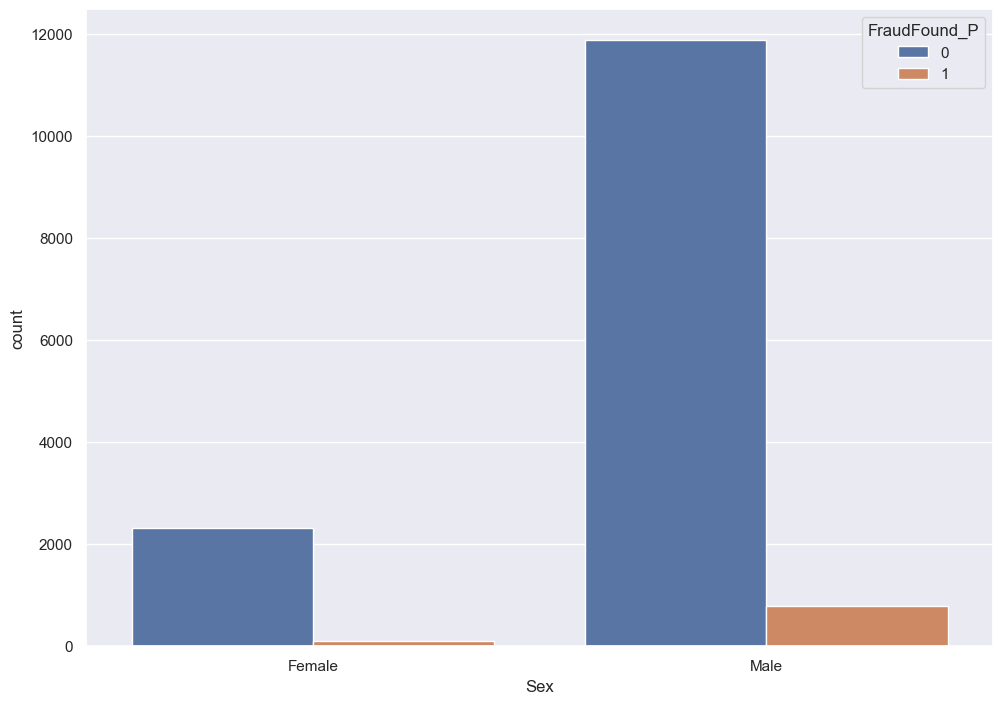

In [208]:
sns.countplot(data=fraud_data_cleaned, x="Sex", hue="FraudFound_P")

<Axes: xlabel='MaritalStatus', ylabel='count'>

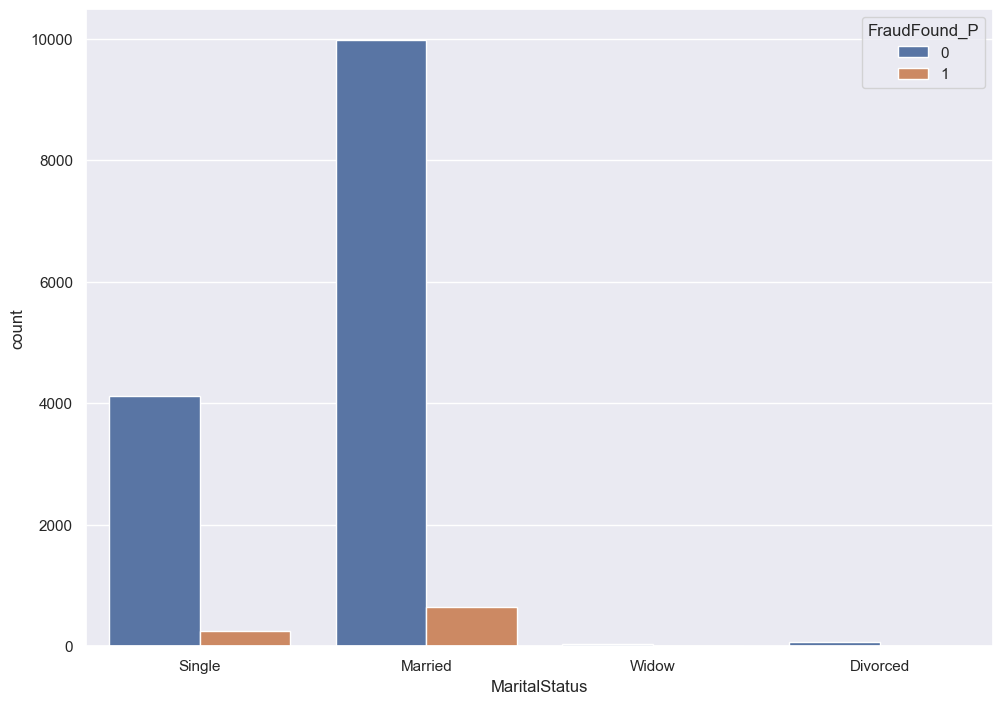

In [209]:
sns.countplot(data=fraud_data_cleaned, x="MaritalStatus", hue="FraudFound_P")

<Axes: xlabel='PastNumberOfClaims', ylabel='count'>

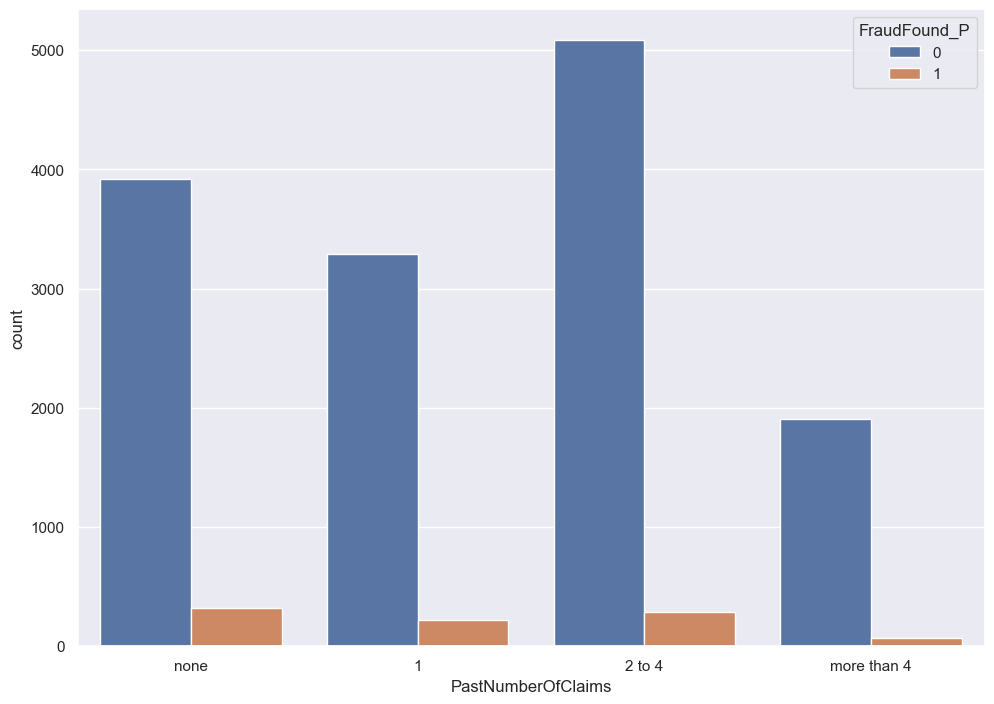

In [210]:
sns.countplot(data=fraud_data_cleaned, x="PastNumberOfClaims", hue="FraudFound_P")

<Axes: xlabel='Age', ylabel='Count'>

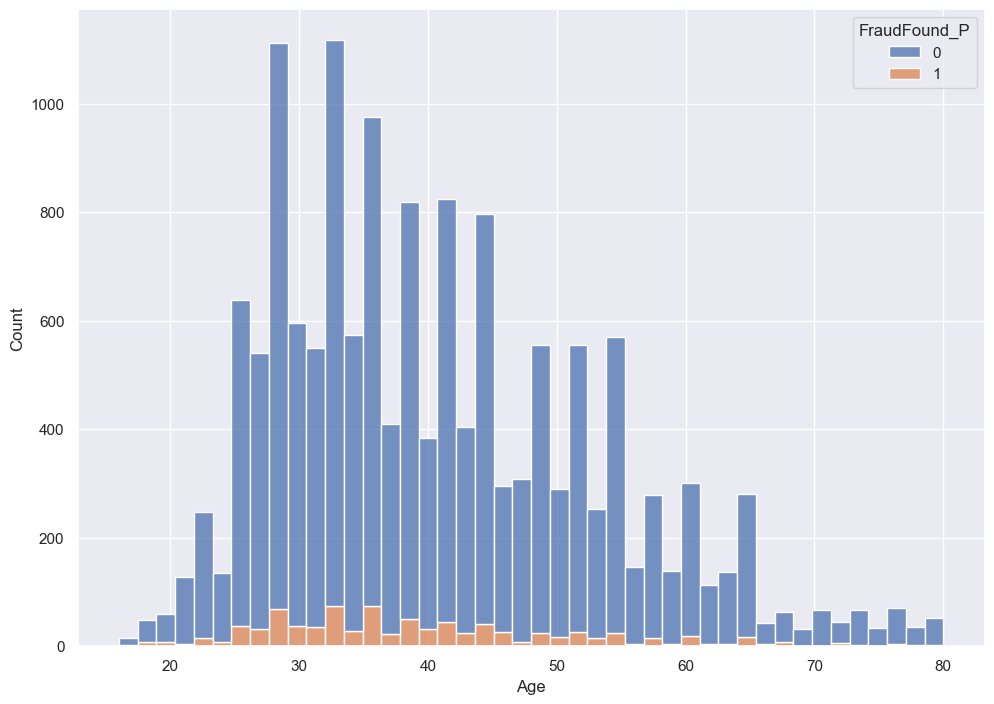

In [211]:
sns.histplot(data=fraud_data_cleaned, x="Age", hue="FraudFound_P", multiple="stack")

In [212]:
claims_per_month = fraud_data_cleaned.groupby(pd.Grouper(key='Date', axis=0, freq='M')).size()
fraud_claims_per_month = fraudulent_claims.groupby(pd.Grouper(key='Date', axis=0, freq='M')).size()

In [213]:
monthly_claims_plot = pd.DataFrame({"Num Claims per Month": claims_per_month, "Num Fraudulent Claims per Month": fraud_claims_per_month})

In [214]:
monthly_claims_plot

,Num Claims per Month,Num Fraudulent Claims per Month
Date,,
1994-01-31,574,45
1994-02-28,503,32
1994-03-31,562,50
1994-04-30,515,41
1994-05-31,551,49
1994-06-30,533,45
1994-07-31,491,30
1994-08-31,469,56
1994-09-30,439,9


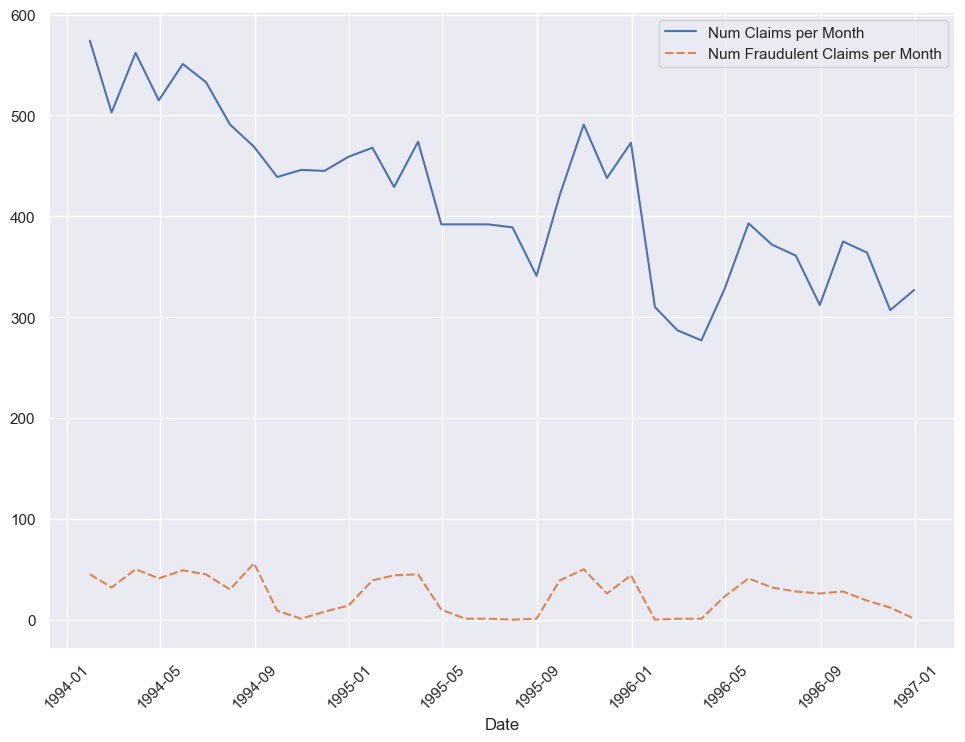

In [215]:
import matplotlib.pyplot as plt
monthly_claims = sns.lineplot(data=monthly_claims_plot)
monthly_claims.tick_params(axis='x', labelrotation=45)

<Axes: xlabel='FraudFound_P', ylabel='Age'>

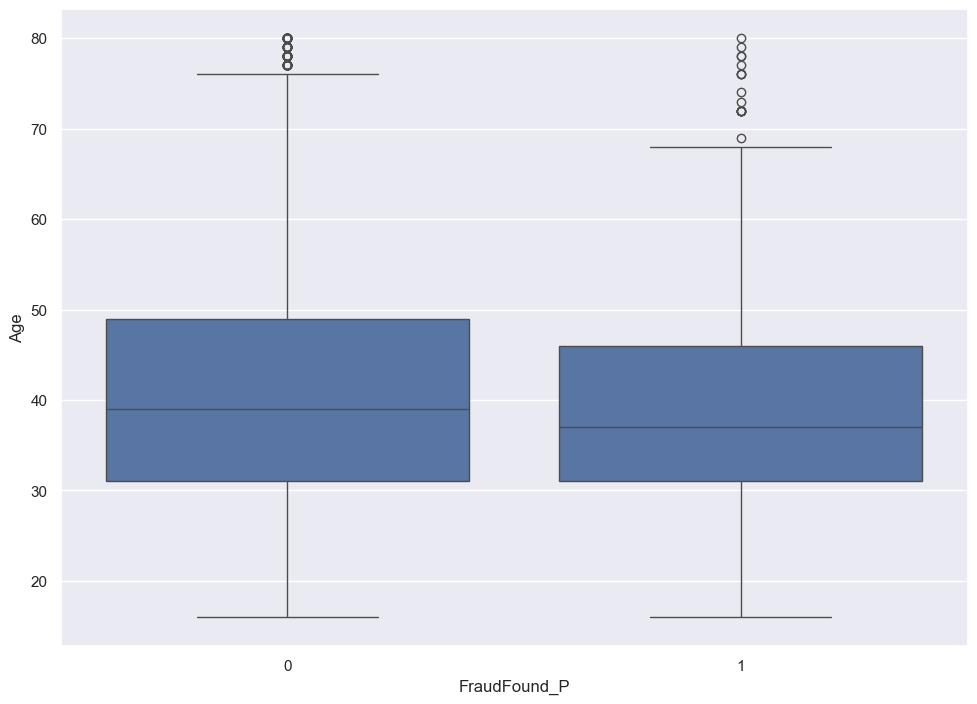

In [216]:
sns.boxplot(data=fraud_data_cleaned, x='FraudFound_P', y="Age")

<Axes: xlabel='FraudFound_P', ylabel='DriverRating'>

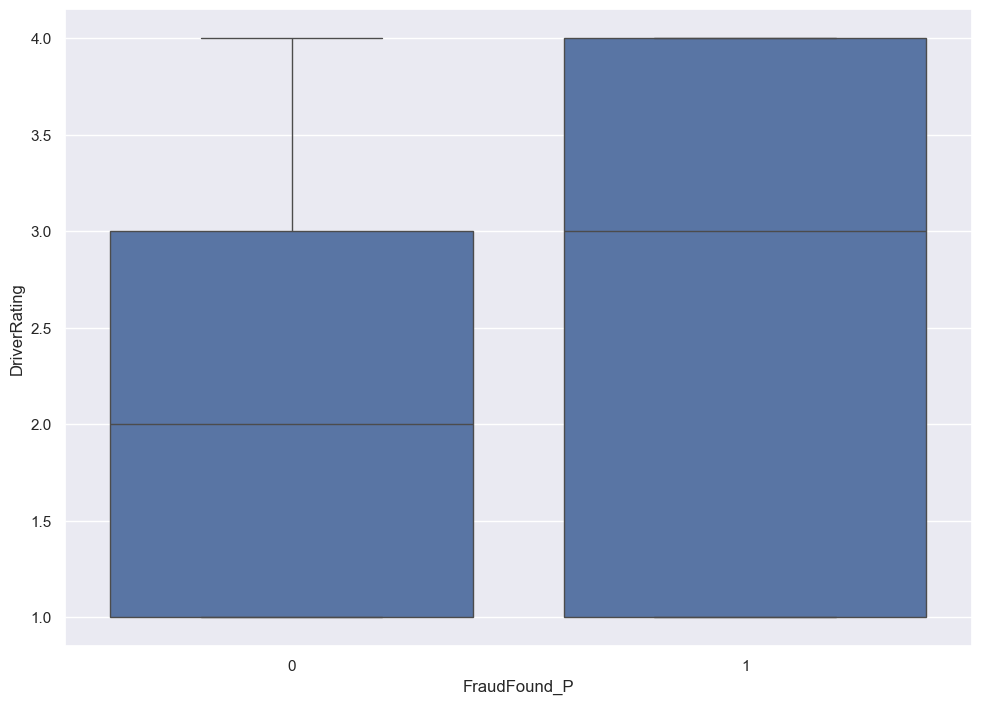

In [217]:
sns.boxplot(data=fraud_data, x='FraudFound_P', y="DriverRating")

<Axes: xlabel='DayOfWeek', ylabel='count'>

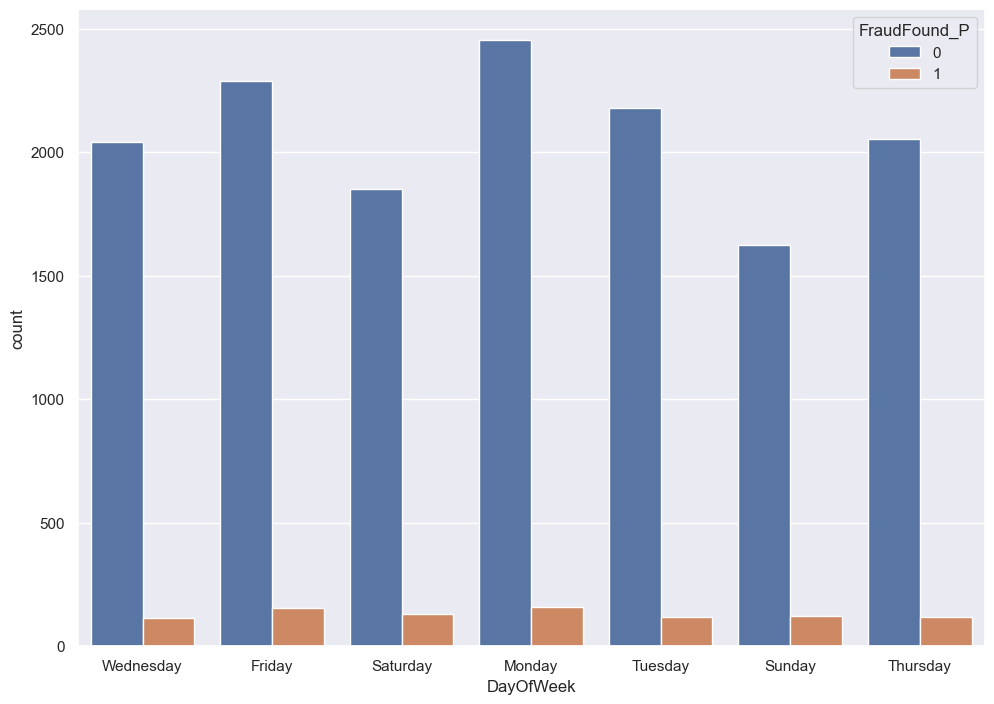

In [218]:
sns.countplot(data=fraud_data, x='DayOfWeek', hue="FraudFound_P")

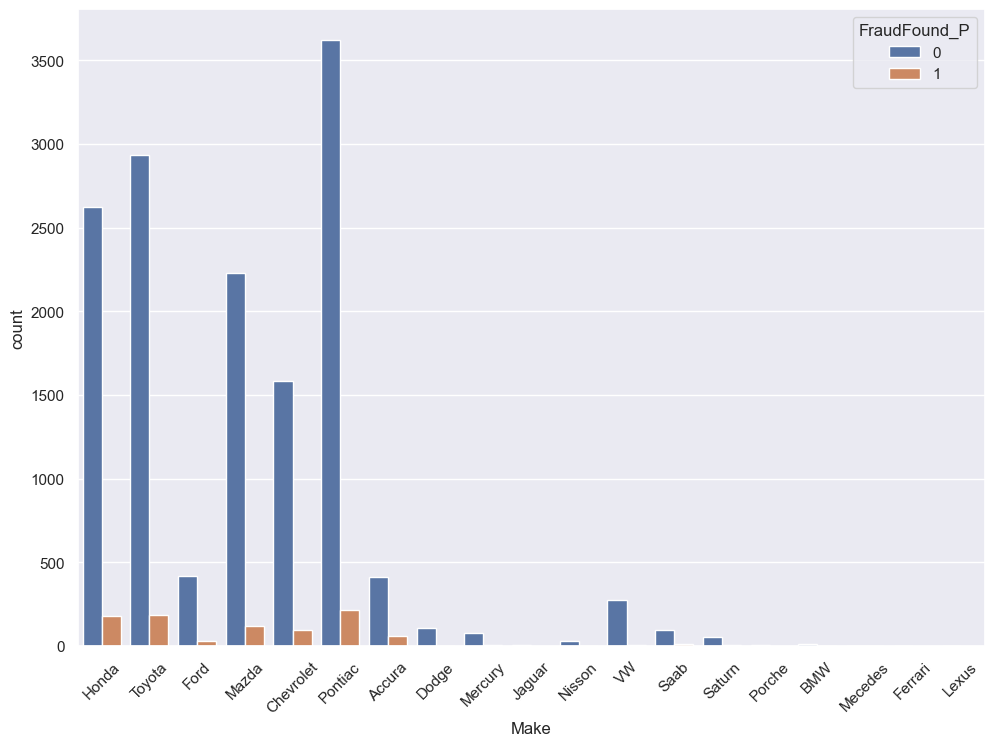

In [219]:
make_plot = sns.countplot(data=fraud_data, x='Make', hue="FraudFound_P")
make_plot.tick_params(axis='x', labelrotation=45)

In [220]:
type(fraud_data_cleaned['FraudFound_P'][0])

numpy.int64

In [221]:
#fraud_data_corr = fraud_data_cleaned.corr()


In [222]:
#sns.heatmap(fraud_data_corr)

In [223]:
fraud_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15100 entries, 0 to 15419
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Month                 15100 non-null  object        
 1   WeekOfMonth           15100 non-null  int64         
 2   DayOfWeek             15100 non-null  object        
 3   Make                  15100 non-null  object        
 4   AccidentArea          15100 non-null  object        
 5   DayOfWeekClaimed      15100 non-null  object        
 6   MonthClaimed          15100 non-null  object        
 7   WeekOfMonthClaimed    15100 non-null  int64         
 8   Sex                   15100 non-null  object        
 9   MaritalStatus         15100 non-null  object        
 10  Age                   15100 non-null  int64         
 11  Fault                 15100 non-null  object        
 12  PolicyType            15100 non-null  object        
 13  VehicleCategory      

In [224]:
fraud_data_cleaned_trimmed = fraud_data_cleaned.loc[:, ["WeekOfMonthClaimed", "Age", "FraudFound_P", "RepNumber", "Deductible", "DriverRating", "Year"]]

<Axes: >

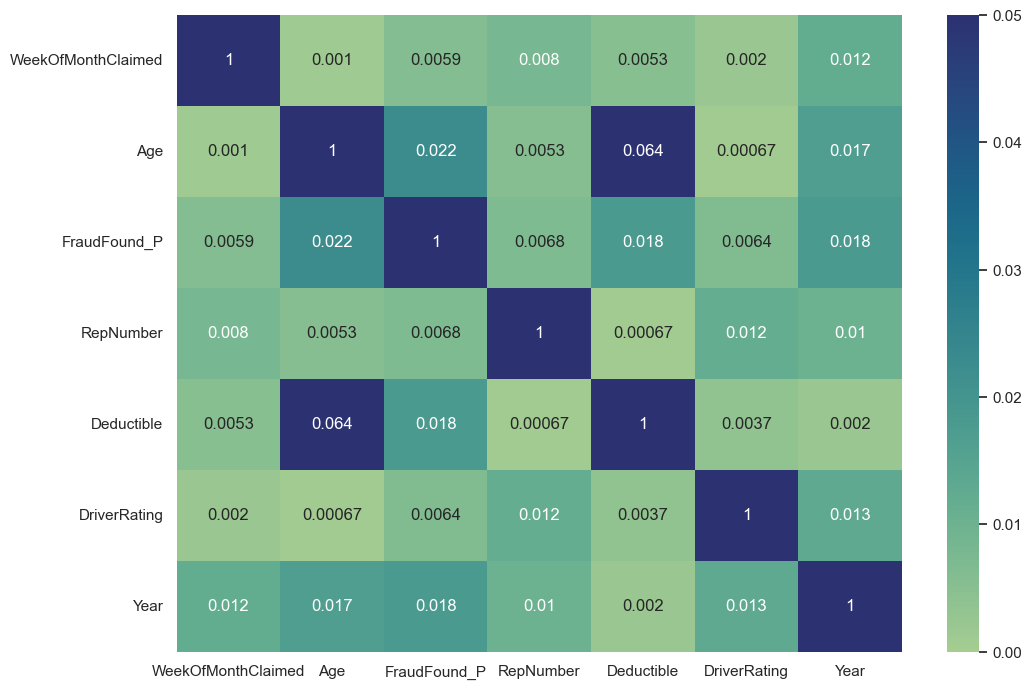

In [225]:
sns.heatmap(np.abs(fraud_data_cleaned_trimmed.corr()), cmap="crest", annot=True, vmin=0, vmax=0.05)

# Data Cleansing

In [226]:
# Select and categorize features to be used in model

nominal = [
"MonthClaimed",
"Fault",
"PolicyType",
"VehicleCategory",
"PoliceReportFiled",
"WitnessPresent",
"AgentType",
"AddressChange_Claim",
"BasePolicy",
'AccidentArea'
]

ordinal = [
"Days_Policy_Accident",
"Days_Policy_Claim",
"AgeOfVehicle",
"NumberOfSuppliments",
"NumberOfCars",
"VehiclePrice",
]

numerical = ["WeekOfMonth",
"WeekOfMonthClaimed",
"Deductible",
"DriverRating",
"Age"]

my_data = fraud_data_cleaned.loc[:,nominal+ordinal+numerical+["FraudFound_P"]]

In [227]:
from sklearn.preprocessing import OneHotEncoder

# Convert categorical nominal data to numerical data

nominal_columns = nominal
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
one_hot_encoded_data = encoder.fit_transform(my_data[nominal_columns])

In [228]:
model_data_encoded = pd.concat([my_data, one_hot_encoded_data], axis=1).drop(columns=nominal_columns)
model_data_encoded

,Days_Policy_Accident,Days_Policy_Claim,AgeOfVehicle,NumberOfSuppliments,NumberOfCars,VehiclePrice,WeekOfMonth,WeekOfMonthClaimed,Deductible,DriverRating,...,AddressChange_Claim_1 year,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability,AccidentArea_Rural,AccidentArea_Urban
0,more than 30,more than 30,3 years,none,3 to 4,more than 69000,5,1,300,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,more than 30,more than 30,6 years,none,1 vehicle,more than 69000,3,4,400,4,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,more than 30,more than 30,7 years,none,1 vehicle,more than 69000,5,2,400,3,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,more than 30,more than 30,more than 7,more than 5,1 vehicle,20000 to 29000,2,1,400,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,more than 30,more than 30,5 years,none,1 vehicle,more than 69000,5,2,400,1,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,more than 30,more than 30,6 years,none,1 vehicle,20000 to 29000,4,5,400,4,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
15416,more than 30,more than 30,6 years,more than 5,3 to 4,30000 to 39000,5,1,400,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
15417,more than 30,more than 30,5 years,1 to 2,1 vehicle,20000 to 29000,5,1,400,4,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
15418,more than 30,more than 30,2 years,more than 5,1 vehicle,20000 to 29000,1,2,400,4,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [229]:
# Convert categorical ordinal data to numerical data

Days_Policy_Accident_cat = ['none', '1 to 7', '8 to 15', '15 to 30', 'more than 30']
Days_Policy_Claim_cat = ['8 to 15', '15 to 30', 'more than 30']
AgeOfVehicle_cat = ["new", "2 years", "3 years", "4 years", "5 years", "6 years", "7 years", "more than 7"]
NumberOfSuppliments_cat = ['none', '1 to 2', '3 to 5', 'more than 5']
NumberOfCars_cat = ["1 vehicle", "2 vehicles", "3 to 4", "5 to 8", "more than 8"]
VehiclePrice_cat = ['less than 20000', '20000 to 29000', '30000 to 39000', '40000 to 59000', '60000 to 69000', 'more than 69000']

from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(categories = [Days_Policy_Accident_cat, Days_Policy_Claim_cat, AgeOfVehicle_cat, NumberOfSuppliments_cat, NumberOfCars_cat, VehiclePrice_cat])
model_data_encoded[ordinal] = ord_enc.fit_transform(model_data_encoded[ordinal])

In [230]:
model_data_encoded

,Days_Policy_Accident,Days_Policy_Claim,AgeOfVehicle,NumberOfSuppliments,NumberOfCars,VehiclePrice,WeekOfMonth,WeekOfMonthClaimed,Deductible,DriverRating,...,AddressChange_Claim_1 year,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability,AccidentArea_Rural,AccidentArea_Urban
0,4.0,2.0,2.0,0.0,2.0,5.0,5,1,300,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,4.0,2.0,5.0,0.0,0.0,5.0,3,4,400,4,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,4.0,2.0,6.0,0.0,0.0,5.0,5,2,400,3,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,4.0,2.0,7.0,3.0,0.0,1.0,2,1,400,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,4.0,2.0,4.0,0.0,0.0,5.0,5,2,400,1,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,4.0,2.0,5.0,0.0,0.0,1.0,4,5,400,4,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
15416,4.0,2.0,5.0,3.0,2.0,2.0,5,1,400,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
15417,4.0,2.0,4.0,1.0,0.0,1.0,5,1,400,4,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
15418,4.0,2.0,1.0,3.0,0.0,1.0,1,2,400,4,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [231]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, precision_recall_curve
X = model_data_encoded. loc[:, model_data_encoded.columns != "FraudFound_P"].values
y = model_data_encoded["FraudFound_P"].values
#Split data into test data and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [232]:
model_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15100 entries, 0 to 15419
Data columns (total 54 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Days_Policy_Accident                15100 non-null  float64
 1   Days_Policy_Claim                   15100 non-null  float64
 2   AgeOfVehicle                        15100 non-null  float64
 3   NumberOfSuppliments                 15100 non-null  float64
 4   NumberOfCars                        15100 non-null  float64
 5   VehiclePrice                        15100 non-null  float64
 6   WeekOfMonth                         15100 non-null  int64  
 7   WeekOfMonthClaimed                  15100 non-null  int64  
 8   Deductible                          15100 non-null  int64  
 9   DriverRating                        15100 non-null  int64  
 10  Age                                 15100 non-null  int64  
 11  FraudFound_P                        15100 non-

# Data Modeling - Logistic Regression

In [233]:
model = LogisticRegression(max_iter=900) 
model.fit(X_train, y_train)

LogisticRegression(max_iter=900)

# Evaluation - Logistic Regression

In [234]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred_proba

array([0.09697256, 0.00060181, 0.1177534 , ..., 0.14394653, 0.01184951,
       0.00576978])

In [235]:
#y_pred_proba.index(max(y_pred_proba))

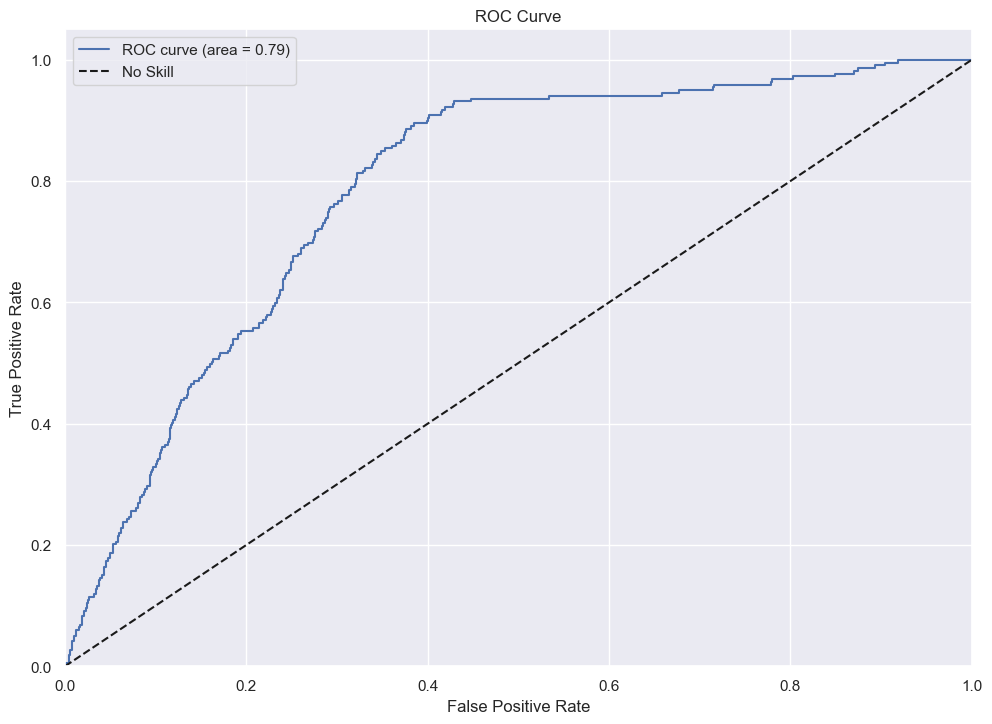

In [236]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) 
roc_auc = auc(fpr, tpr)
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

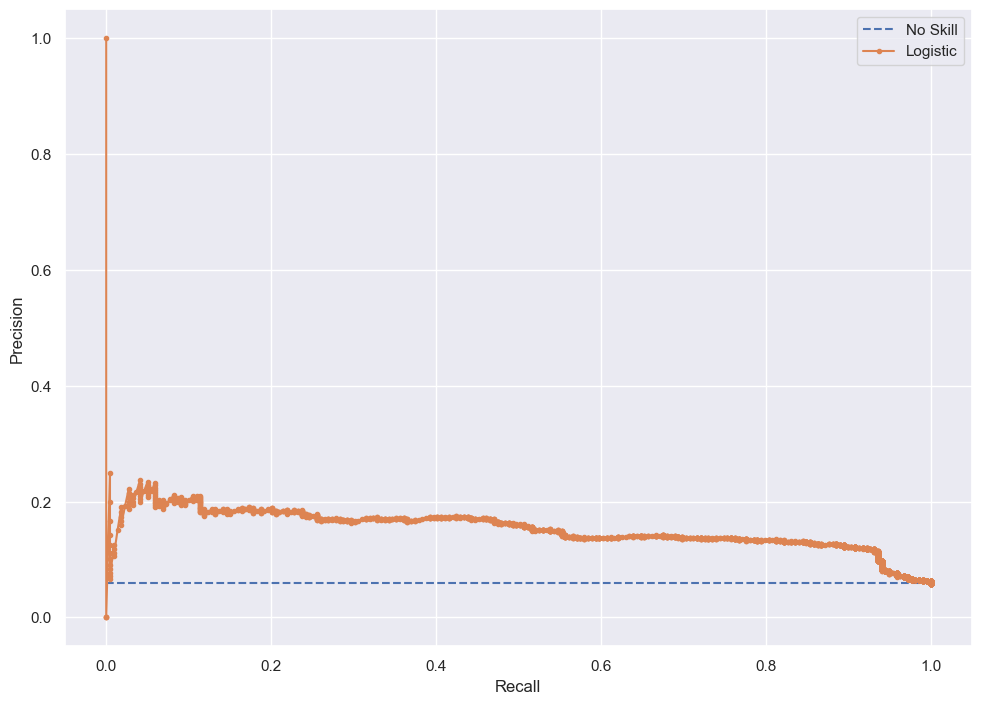

In [237]:
# calculate the no skill line as the proportion of the positive class
no_skill = len(y[y==1]) / len(y)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

# Data Modeling - Random Forest

In [238]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)



RandomForestClassifier()

# Evaluation - Logistic Regression

In [239]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred_proba


array([0.11      , 0.        , 0.07      , ..., 0.15633333, 0.09      ,
       0.        ])

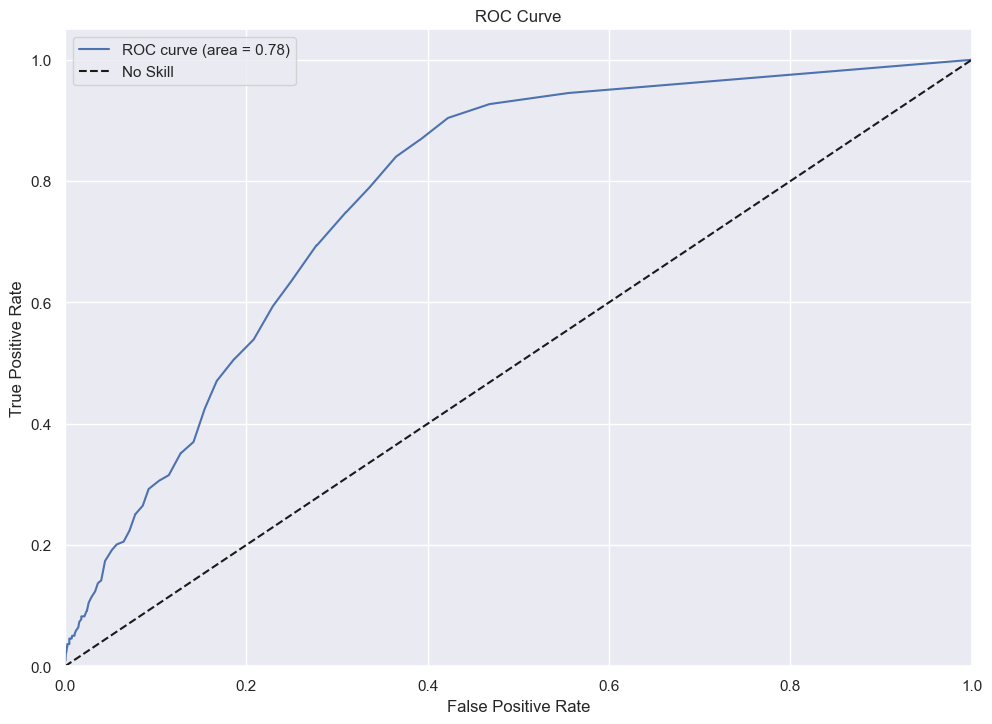

In [240]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) 
roc_auc = auc(fpr, tpr)
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

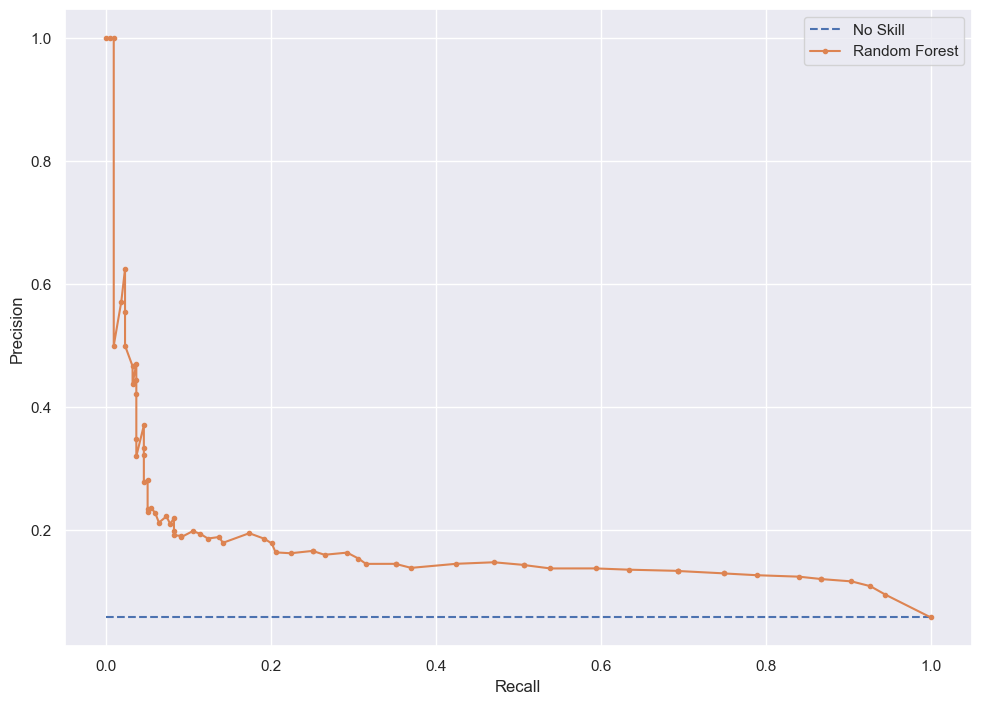

In [241]:
# calculate the no skill line as the proportion of the positive class
no_skill = len(y[y==1]) / len(y)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='Random Forest')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()